# Section 4: Discrete Variable Representation

Last week, we studied the connection between position and momentum space using Fourier transforms. We learned that we can work in either "position space" with basis states $\langle x' | x \rangle = \delta(x-x')$, or in "momentum space" with basis states $\langle k' | k \rangle = \delta(k-k')$. We also showed that these kets are connected by the relation 
\begin{equation}
\langle k | x \rangle = (2\pi)^{-1/2} e^{-i k x}.
\end{equation}
In this week's section, we will use what we learned to build and solve matrix representations of the Hamiltonian for arbitrary 1D potentials using a method called the "Discerete Variable Representation" (DVR). This is a method that is widely used in physics and chemistry to solve for the states and energies of potential energy surfaces needed to describe molecular vibrations, chemical reactions, and beyond.

**Learning Goals:**
After this Section you should be able to: 
- Understand when it is more natural to work in a "position" vs. "momentum" basis 
- Use the sinc basis to express the Hamiltonian for an arbitrary 1D potential
- Find the eigenvalues and eigenvectors of Hamiltonians for arbtirary potentials using the discrete variable representation

## Motivating the Sinc-Basis DVR

As with previous problems, we'll first introduce a grid of $N$ equally spaced points on the domain $[x_\text{min}, x_\text{max}]$. The points can be specified as 
\begin{equation}
x_j = x_\text{min} + (j-1) \Delta x
\end{equation}
where 
\begin{equation}
\Delta x = \frac{x_\text{max} - x_\text{min}}{N-1}.
\end{equation}

Next, we want to set up some basis $\{|\phi_i\rangle\}$ that allows us to express our wavefunction as a superposition of convenient basis functions. Putting this into math based on last week's section, we want a way to implement the expansion
\begin{equation}
\psi(x) = \langle x | \psi \rangle = \sum_{i=1}^{n} c_i \langle x | \phi_i \rangle = \sum_{i=1}^{n} c_i \phi_i(x).
\end{equation}

There are many possible reasonable choices of this basis, and there is a vast literature of DVR methods that use different choices (some that can't even be written as nice analytical functions!). But let's think about what we would want in a general DVR basis set.

**Question: What nice properties might we want?**


**Answer:** Some example of useful properties would be:
- We want the basis to satisfy $\langle x_i | x_j \rangle \propto \delta_{i,j}$
- It would be nice if the basis functions were "well behaved" so that we can evaluate derivatives, Fourier transforms, etc.

One example of a set of functions that satisfy these desiderata are the *sinc functions*:
\begin{equation}
\phi_j(x) = \frac{1}{\sqrt{\Delta x}} \frac{\sin[\pi (x-x_j)/\Delta x]}{\pi (x-x_j)/\Delta x} = \frac{1}{\sqrt{\Delta x}} \text{sinc} [\pi (x-x_j)/\Delta x].
\end{equation}

First of all, let's explore why these basis functions are useful. It's best to start this discussion graphically, so let's use some code to implement the basis and plot the basis functions.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In the space below, we give you some code that defines a grid of x points and a function that implements the sinc-basis. Use these pieces of code to explore the sinc-basis functions and learn about their properties. You are looking to answer questions like the following:
- What is the value of a basis function $\phi_j$ at grid point $x_j$?
- What is the value of a basis function $\phi_j$ at a grid point $x_{j+1}$? At $x_{j+2}$?
- In general, how do the basis functions relate to one another?

In [12]:
# Parameters that we set
xmin = 0
xmax = 9
N = 10

# Grid spacing and position-space grid points
Delta_x = (xmax-xmin)/(N-1)
xs = np.linspace(xmin,xmax,N)
xs_fine = np.arange(xmin,xmax,Delta_x/1000)

# Definition of the sinc-basis functions
def phi(x,xj):
    return 1/np.sqrt(Delta_x) * np.sinc((x-xj)/Delta_x)

There are two useful ways that we can look at these basis functions. First of all, we can plot an example like $\phi_3(x_j)$ to look at the $i=3$ basis function evaluated at each grid point. If we overlay this with a plot of $\phi_3(x)$ evaluated on a much finer grid, we see that the sinc-basis is defined such that a given basis function $\phi_i$ is nonzero at grid point $x_i$, and its oscillations ensure that it passes through zero at every other grid point!

**Question:** Does it matter that the sinc function takes on nonzero values away from the $i\neq j$ grid points?

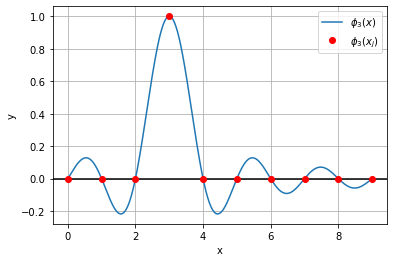

In [13]:
plt.axhline(0,color='k')
plt.plot(xs_fine, phi(xs_fine, xs[3]), label=f"$\phi_3(x)$")
plt.plot(xs,phi(xs,xs[3]),'ro', label=f"$\phi_3(x_j)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

It can also be useful to look at a series of these sinc functions centered at different grid points. Notice where they all pass through zero, and where each individual basis function doesn't pass through zero.

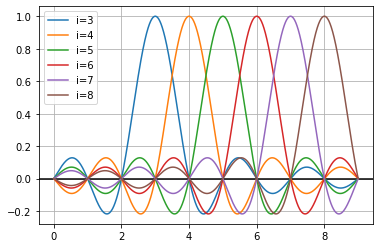

In [14]:
plt.axhline(0,color='k')
for j in range(3,9):
    plt.plot(xs_fine, phi(xs_fine, xs[j]),label=f"i={j}")
    
plt.legend()
plt.grid()

### Interpreting the Sinc-Basis

**Question:** In light of these plots, how can we interpret the sinc-basis functions as compared to a set of Dirac delta functions?

**Answer:** This is a finite resolution basis that is like the closest possible approximation to a delta function that we can make for a given range on the number of momentum basis functions that our spatial grid can accomodate. As the plots above show, we means this in the sense that these basis states satisfy 
\begin{equation}
\phi_j(x_k) \propto \delta_{k,j},
\end{equation}
so a given basis function only gives a nonzero contribution to a function at the point at which that basis function is centered. 

The sinc basis has a nice relationship to the Fourier transforms that we discussed last week. In particular, the sinc basis functions can be written as follows:
\begin{equation}
\phi_j(x) = \frac{\sqrt{\Delta x}}{2\pi} \int_{-\pi/\Delta x}^{\pi/\Delta x} e^{i k(x-x_j)} dk
\end{equation}

**Question:** Can you justify this form qualitatively? How does it relate to Fourier transforms that we studied last week? And why are the limits on the integral those numbers?

## Deriving the Kinetic Energy Matrix

Now that we have a useful basis, we can try to solve problems with it. We still need to learn how to express the Hamiltonian in this basis. Since the Hamiltonian is
\begin{equation}
H = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)
\end{equation}
we need to figure out how to express the second derivative operator and the $V(x)$ operator in our chosen basis.

Let's start with the kinetic energy term. We want to derive a kinetic energy matrix with matrix elements
\begin{equation}
T_{ij} = -\frac{\hbar^2}{2m} \left \langle \phi_i \left\lvert \frac{d^2}{dx^2} \right\rvert \phi_j \right \rangle.
\end{equation}

It turns out this is where the Fourier transform expression is super helpful. We can go through the following steps:
\begin{equation}
\int_{-\infty}^{\infty} \phi_i^\ast(x) \frac{d^2}{dx^2} \phi_j(x) dx = \frac{\Delta x}{(2\pi)^2} \int_{-\infty}^{\infty} dx \int_{-\pi/\Delta x}^{\pi/\Delta x} e^{-i k (x-x_i)} dk \int_{-\pi/\Delta x}^{\pi/\Delta x} \left( \frac{d^2}{dx^2} e^{i k' (x-x_j)} \right) dk'
\end{equation}

Because we've expressed the basis function in terms of plane waves, evaluating $\frac{d^2}{dx^2}$ is really easy: it just corresponds to pulling down a factor of $(ik)^2$. That gets us to
\begin{equation}
\frac{\Delta x}{(2\pi)^2} \int_{-\pi/\Delta x}^{\pi/\Delta x} (ik)^2 e^{i k (x_i - x_j)} dk.
\end{equation}


If you work through these integrals, you will find that:
\begin{equation}
\boxed{T_{i,j=i} = \frac{\hbar^2}{2m \Delta x^2} \frac{\pi^2}{3}}
\end{equation}
and
\begin{equation}
\boxed{T_{i,j \neq i} = \frac{\hbar^2}{2m \Delta x^2} \frac{2 (-1)^{i-j}}{(i-j)^2}}
\end{equation}

**Task:** Now fill in the code below to make a function that builds the kinetic energy operator and the potential energy operator.

In [15]:
# work in some convenient units
hbar = 1
m = 1

In [16]:
# Function to make the kinetic energy operator
def make_T(x):
    Delta_x = x[1]-x[0]
    N = xs.shape[0]
    Tmat = np.zeros((N,N))
    
    # now loop over kinetic energy matrix and fill in matrix elements
    for i in range(N):
        for j in range(N):
            if i==j:
                Tmat[i,j] = (hbar**2/(2*m*Delta_x**2)) * (-1)**(i-j) * (np.pi**2)/3
            else:
                Tmat[i,j] = (hbar**2/(2*m*Delta_x**2)) * (-1)**(i-j) * 2/(i-j)**2
                
    return Tmat
  


## Deriving the Potential Energy Matrix

For the potential energy matrix, we need to express $V(x)$ in matrix form. Since $V(x)$ can be expanded as a power series in the position operator $\hat{x}$, let's first look at the matrix form of $\hat{x}$ itself. We want the matrix elements $x_{ij} = \langle \phi_i | x | \phi_j \rangle$. In other words, we want
\begin{equation}
\int_{-\infty}^{\infty} \phi_i(x)^\ast x \phi_j(x) dx = \frac{\Delta x}{(2\pi)^2} \int_{-\pi/\Delta x}^{\pi/\Delta x} dk \int_{-\pi/\Delta x}^{\pi/\Delta x} dk' e^{ikx_i - ik'x_j} \int_{-\infty}^{\infty} x e^{i x (k'-k)} dx.
\end{equation}
In the last term, note that we can replace $x$ by $\frac{d}{d(ik')}$ and then pull the derivative outside of the integral over $x$ (since it doesn't depend on $x$ anymore).  Working through the integrals after that step, we get to
\begin{equation}
x_{ij} = \frac{\Delta x}{2\pi} x_i \int_{-\pi/\Delta x}{\pi/\Delta x} dk' e^{ik'(x_i-x_j)} = x_i \delta_{i,j}.
\end{equation}

**The important conclusion is that $\hat{x}$ is diagonal in this basis!** So the potential energy, which can be expanded in powers of $x$ is also diagonal in this basis! Knowing this, we can just make the potential energy operator by building a diagonal matrix from $V(x)$. The function `make_V` does this, and then the function `make_H` just calls the kinetic and potential energy functions and puts them together.

In [17]:
# Function to make the potential energy operator
def make_V(x,Vfunc):
    Vmat = np.diag(Vfunc(x))
    return Vmat

# Function to make the full Hamiltonian
def make_H(x,Vfunc):
    return make_T(x) + make_V(x,Vfunc)

## Testing the DVR code

That was a lot of work to get our Hamiltonian matrix. But now let's see the payoff! We'll see that the DVR code is incredibly accurate, especially compared to the finite differences method that we used before. As always let's test our code by using a harmonic oscillator potential. Let's start with a 20 point grid and see how the calculations do for energies and wavefunctions.

In [18]:
xs = np.linspace(-10,10,20)

In [19]:
def Vharmonic(x):
    return 0.5*x**2

In [20]:
Ham = make_H(xs,Vharmonic)
vals, vecs = np.linalg.eigh(Ham)
vals[0:4]

array([0.50042652, 1.49199271, 2.54377448, 3.30864454])

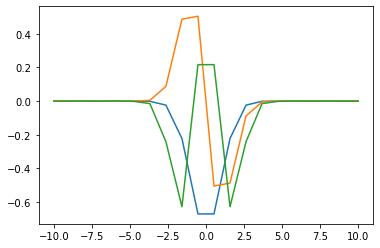

In [21]:
plt.plot(xs,vecs[:,0:3])

Let's look at the accuracy of our solutions as a function of quantum number.

Text(0, 0.5, 'Fractional error')

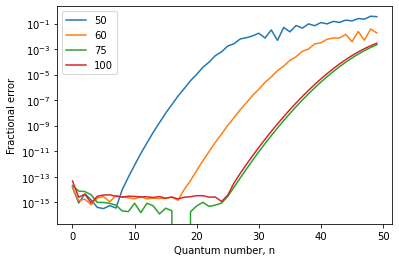

In [22]:
plt.figure()

Nlist = [50,60,75,100]
for i in range(len(Nlist)):
    dx = 20/Nlist[i]
    xs = np.linspace(-10,10,Nlist[i])
    Ham = make_H(xs,Vharmonic)
    vals, vecs = np.linalg.eigh(Ham)
    energies_exact = 0.5 + np.arange(0,len(xs),1)
    errors = np.abs(vals - energies_exact)/energies_exact
    plt.semilogy(np.arange(0,50,1),errors[0:50])
    
plt.legend([Nlist[i] for i in range(len(Nlist))])
plt.xlabel("Quantum number, n")
plt.ylabel("Fractional error")

**Question:** Explain the differences between the case with 50 grid points and the case with 60 grid points. Why is the agreement better to higher $n$ for 60 grid points? Also, why does the agreement seem to always get worse above $n \sim 25$, even if the number of grid points is increased?

### Comparing DVR to Finite Differences

Let's look at the accuracy of the numerical solution as a function of the number of grid points. We can compare this to the results of HW 1 to see how the DVR method does against finite differences.

In this block, write a function that computes the fractional error in the SHO eigenstates as a function of the number of grid points used.

In [23]:
Nlist = np.logspace(1,2.5,10)
errorlist = np.zeros(len(Nlist))
for i in range(len(Nlist)):
    N = Nlist[i]
    xs = np.arange(-10,10,20/Nlist[i])
    H = make_H(xs,Vharmonic)
    evals, evecs = np.linalg.eigh(H)
    errorlist[i] = np.abs(evals[0] - 0.5)/0.5

This next block is already written for you-- nothing you need to do!--- to implement and solve the same problem using the Numerov method. The code is taken from the HW1 solutions.

In [24]:
# Function to make the A matrix:
def makeA(N,h):
    A = np.zeros((N,N))
    for i in range(N):
        A[i,i] = -2.0/h**2 # fill in diagonal
        if i==0: # the first row looks like [-2,1,0,0,0...]/h^2
            A[i,i+1] = 1/h**2
        elif i==N-1: # the last row looks like [...,0,0,1,-2]/h^2
            A[i,i-1] = 1/h**2
        else: # all other rows look like [...0,1,-2,1,0,...]/h^2
            A[i,i+1] = 1/h**2
            A[i,i-1] = 1/h**2
    return A

# Function to make the B matrix:
def makeB(N):
    B = np.zeros((N,N))
    for i in range(N):
        B[i,i] = 10.0/12 # fill in diagonal
        if i==0:
            B[i,i+1] = 1/12
        elif i==N-1:
            B[i,i-1] = 1/12
        else:
            B[i,i+1] = 1/12
            B[i,i-1] = 1/12
    return B

# Function to make the Hamiltonian matrix on a grid of N points between (xmin,xmax), then find eigenvalues/eigenvectors.
# The potential energy Vfunc is an arbitrary function that gets passed in and discretized inside of this function.
def solve(N,xmin,xmax,Vfunc):
    x = np.linspace(xmin,xmax,N) # grid of x values
    h = x[1]-x[0] # grid spacing

    # make the A and B matrices
    A = makeA(N,h)
    B = makeB(N)
    Tmat = -0.5 * np.linalg.inv(B) @ A # This is the matrix representing kinetic energy.

    # put the potential energy onto a grid and then put that into a diagonal matrix
    Vgrid = np.zeros(N)
    for i in range(N):
        Vgrid[i] = Vfunc(x[i])
    Vmat = np.diag(Vgrid)

    # Finally we get the whole Hamiltonian
    Hmat = Tmat + Vmat

    # Now diagonalize the Hamiltonian. 
    # eigh returns sorted values and vectors!
    evals, evecs = np.linalg.eigh(Hmat)
    
    return evals, evecs

# NOW ACTUALLY CALL THE NUMEROV METHOD
vals_numerov, vecs_numerov = solve(1000, -10,10, Vharmonic)
errorlist_numerov = np.zeros(len(Nlist))
for i in range(len(Nlist)):
    N = round(Nlist[i])
    vals_num, vecs_num = solve(N,-10,10,Vharmonic)
    errorlist_numerov[i] = np.abs(vals_num[0] - 0.5)/0.5


Now, make a plot of the relative errors comparing the numerov and DVR methods for the ground state as a function of the grid spacing $\Delta x$.

Text(0, 0.5, 'Fractional error')

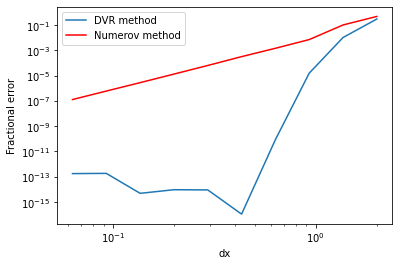

In [25]:
plt.loglog([20/Nlist[i] for i in range(len(Nlist))],errorlist, label="DVR method")
plt.loglog([20/Nlist[i] for i in range(len(Nlist))],errorlist_numerov, 'r', label="Numerov method")
plt.legend()
plt.xlabel("dx")
plt.ylabel("Fractional error")

Clearly the DVR method is much better than the Numerov technique! For reasonable grid sizes, the DVR method gets the ground-state energy with almost 10 orders of magnitude better relative agreement!! (And remember, the Numerov method was already much better than a "plain" second-order finite differences approximation to the Hamiltonian...)

**Question:** Why do you think the DVR method stops getting more accurate at a certain step size? What does this tell you about setting up simulations?